## Problem statement:

More information about features: 

   1.  https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008
   2. https://www.hindawi.com/journals/bmri/2014/781670/
   3. Features formation: https://www.hindawi.com/journals/bmri/2014/781670/tab1/


So this week we have a problem coming to us from the medical community. We're looking specifically at a diabetes study. And the problem is hospital readmission.

Now we don't want people in hospitals. We want them to be well. And we certainly don't want them to be readmitted. This comes at a huge cost to the patient in terms of bills, lost wages, strain on their family and whatnot. So our goal is no readmission.


***Predict readmission of the patient within 30 days of initial hospitalization.***


Import libraries 

In [58]:
#for data
import pandas as pd 
import numpy as np 

# scikit-learn's SimpleImputer to replace "nan" values
from sklearn.impute import SimpleImputer

# Display all columns 
pd.options.display.max_columns = None
## for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from yellowbrick.classifier import ClassificationReport

import warnings
warnings.filterwarnings("ignore")

### Import Dataset 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy2/data/diabetic_data.csv')

In [4]:
metadata=pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy2/data/IDs_mapping.csv')
feature_desc = pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy2/data/features_descriptions.csv')

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


 #### Clean the Dataset 

In [6]:
# Replace all ? with NaN
df.loc[df['weight']=='?','weight'] = np.nan
df.loc[df['diag_1']=='?','diag_1'] = np.nan 
df.loc[df['diag_2']=='?','diag_2'] = np.nan 
df.loc[df['diag_3']=='?','diag_3'] = np.nan 
df.loc[df['age']=='?','age'] == np.nan
df.loc[df['payer_code']=='?','payer_code'] = np.nan
df.loc[df['medical_specialty']=='?','medical_specialty'] = np.nan
df.loc[df['race']=='?','race'] = np.nan
df.loc[df['weight']=='?','weight']=np.nan

# Remove characters between age 
df['age'] = df['age'].str.strip('[)')
df['weight'] = df['weight'].str.strip('[)')

# there are 3 instances with unknown gender. Replaced with mode 
df['gender']=df['gender'].replace('Unknown/Invalid','Female')

In [7]:
df.shape

(101766, 50)

In [8]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0-10,NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10-20,NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20-30,NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30-40,NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40-50,NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [31]:
feature_desc = feature_desc[1:]

feature_name =feature_desc['Feature name']
feature_description = feature_desc['Description and values']

for f,d in zip(feature_name,feature_description):
    print()
    print(f,'-->',d)


Patient number --> Unique identifier of a patient

Race --> Values: Caucasian, Asian, African American, Hispanic, and other

Gender --> Values: male, female, and unknown/invalid

Age --> Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight --> Weight in pounds.

Admission type --> Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

Discharge disposition --> Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source --> Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital --> Integer number of days between admission and discharge

Payer code --> Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay

Medical specialty --> Integer identifier of a specialty of the admitti

In [11]:
df.describe(include=['object'])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,2,10,9,17,72,716,748,789,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,70-80,75-100,MC,InternalMedicine,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54711,26068,1336,32439,14635,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [12]:
# Drop unnecessary columns 
df = df.drop(['encounter_id','patient_nbr'],axis=1)

<b>New Features / Feature Engineering  </b> 

In [13]:
# Create new feature AgeGroup
df['AgeGroup'] = df['age'].map({
                         '0-10':'child',
                        '10-20':'young adult',
                        '20-30':'twenties',
                        '30-40':'thirties',
                        '40-50':'fourties',
                        '50-60':'fifties',
                        '60-70':'sixties',
                        '70-80':'seventies',
                        '80-90':'eighties',
                        '90-100':'nineties'})

https://www.cdc.gov/obesity/adult/defining.html
        < = 124 Underweight
        125 - 168 Healthy weight
        169 - 202 Overweight
        >203 Obesity

124 lbs or less	Below 18.5	Underweight
125 lbs to 168 lbs	18.5 to 24.9	Healthy weight
169 lbs to 202 lbs	25.0 to 29.9	Overweight
203 lbs or more	30 or higher	Obesity
271 lbs or more	40 or higher	Class 3 Obesity

In [14]:
# Categorizing weights
df['weight_category'] = df['weight'].map({'50-75':'Underweight','75-100':'Underweight','100-125':'Underweight',
                                '125-150':'Healthy weight','150-175':'Healthy weight','175-200':'Overweight',
                                         '>200':'Obesity'})

In [15]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [16]:
# https://www.singlecare.com/blog/normal-a1c-levels/
# Aic level general guidelines

df['A1Cresult']=df['A1Cresult'].map({'>7':'uncontrolled diabetes','>8':'critical high','Norm':'Normal','None':'Unknown'})

In [17]:
# Map admission_type_id to its appropriate name 
df['admission_type_id'] = df['admission_type_id'].map({1:'Emergency',
                                 2:'Urgent',
                                 3:'Elective',
                                 4:'Newborn',
                                 5:'Not Available',
                                 6:'NULL',
                                 7:'Trauma Center',
                                 8:'Not Mapped'})

In [18]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [19]:
# Get actual name of discharge_disposition_id and its id number into dataframe 
discharge_disposition_id_map=metadata[10:40]
discharge_disposition_id_map = discharge_disposition_id_map.rename(columns={'admission_type_id':'discharge_disposition_id'})

discharge_disposition_id_map = discharge_disposition_id_map.rename(columns={'description':'discharge_disposition_type'}) 

discharge_disposition_id_map['discharge_disposition_id'] = discharge_disposition_id_map['discharge_disposition_id'].astype(int)
#discharge_disposition_id_map

In [20]:
admission_source = metadata[42:69]
admission_source = admission_source.rename(columns={'description':'admission_source_type',
                                                   'admission_type_id':'admission_source_id'})
admission_source['admission_source_id'] = admission_source['admission_source_id'].astype(int)


In [21]:
# Merage df and discharge_disposition_id_map to get proper name of discharge_disposition_id 
df = pd.merge(df,discharge_disposition_id_map,on='discharge_disposition_id',how='left')

# drop discharge_disposition_id later 

In [22]:
# Merger df and admission_source to map admission_source name to its ids 
df = pd.merge(df,admission_source,on='admission_source_id',how='left')

# drop admission_source_id later  

In [23]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AgeGroup,weight_category,discharge_disposition_type,admission_source_type
0,Caucasian,Female,0-10,NaN,NULL,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,child,NaN,Not Mapped,Physician Referral
1,Caucasian,Female,10-20,NaN,Emergency,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,young adult,NaN,Discharged to home,Emergency Room
2,AfricanAmerican,Female,20-30,NaN,Emergency,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,Unknown,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,twenties,NaN,Discharged to home,Emergency Room
3,Caucasian,Male,30-40,NaN,Emergency,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,thirties,NaN,Discharged to home,Emergency Room
4,Caucasian,Male,40-50,NaN,Emergency,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,Unknown,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,fourties,NaN,Discharged to home,Emergency Room


    diag_1 = The primary diagnosis (coded as first three digits of ICD9); 848 distinct 
    diag_2 = Secondary diagnosis (coded as first three digits of ICD9); 923 
    diag_3 = Additional secondary diagnosis (coded as first three digits of ICD9)
    
 We probably dont need this features. Or we can do seach on what each code means and use that. 

In [24]:
# Drop more unuseful features 
df = df.drop(['weight','age'],axis=1) # drop weight because 97% data missing. Drop age because we have AgeGroup.

In [25]:
summary = df.describe(include='object')
print('Columns:',summary.columns)
summary

Columns: Index(['race', 'gender', 'admission_type_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'AgeGroup', 'weight_category', 'discharge_disposition_type',
       'admission_source_type'],
      dtype='object')


,race,gender,admission_type_id,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AgeGroup,weight_category,discharge_disposition_type,admission_source_type
count,99493,101766,101766,61510,51817,101745,101408,100343,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,3052,98075,94985
unique,5,2,8,17,72,716,748,789,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3,10,4,25,16
top,Caucasian,Female,Emergency,MC,InternalMedicine,428,276,250,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,seventies,Underweight,Discharged to home,Emergency Room
freq,76099,54711,53990,32439,14635,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864,26068,2858,60234,57494


In [26]:
# Find all columns with NA values
print('Features with missing data are:')
print()
for col in summary.columns:
    if summary.loc['count',col]!= df.shape[0]:
         print(col)
        

Features with missing data are:

race
payer_code
medical_specialty
diag_1
diag_2
diag_3
weight_category
discharge_disposition_type
admission_source_type


In [27]:
# Check percentage of missing data 
df[['payer_code','medical_specialty','diag_1','diag_2','weight_category','discharge_disposition_type','admission_source_type']].isna().sum()/df.shape[0]*100

payer_code                    39.557416
medical_specialty             49.082208
diag_1                         0.020636
diag_2                         0.351787
weight_category               97.000963
discharge_disposition_type     3.626948
admission_source_type          6.663326
dtype: float64

## Define the statistical data types.

Define which features are numeric, nominal, ordinal, categorical and unwanted. 

<b>Numeric Discrete Features </b>

In [28]:
# loop over the column and get me only the col with int datatype
print('List Of Numeric Discrete are:')
[(col,dtype) for col,dtype in df.dtypes.items() if dtype =='int64']

List Of Numeric Discrete are:


[('discharge_disposition_id', dtype('int64')),
 ('admission_source_id', dtype('int64')),
 ('time_in_hospital', dtype('int64')),
 ('num_lab_procedures', dtype('int64')),
 ('num_procedures', dtype('int64')),
 ('num_medications', dtype('int64')),
 ('number_outpatient', dtype('int64')),
 ('number_emergency', dtype('int64')),
 ('number_inpatient', dtype('int64')),
 ('number_diagnoses', dtype('int64'))]

<b>Categorical Features </b> 

In [29]:
print("List of Categorical Features: ")
print()
print([feature for feature,dtype in df.dtypes.items() if dtype=='object'])
    

List of Categorical Features: 

['race', 'gender', 'admission_type_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'AgeGroup', 'weight_category', 'discharge_disposition_type', 'admission_source_type']


<b>Ordinal Features </b> 

Weight of these features will have impact on readmition. Hence, they should be ordinal instead of dummy code
    
        1. AgeGroup
        2. max_glu_serum
        3. ACresult
        

In [30]:
df['max_glu_serum'].value_counts() 

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [34]:
df[['metformin']].value_counts()


metformin
No           81778
Steady       18346
Up            1067
Down           575
dtype: int64

In [35]:
df['repaglinide'].value_counts() 

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

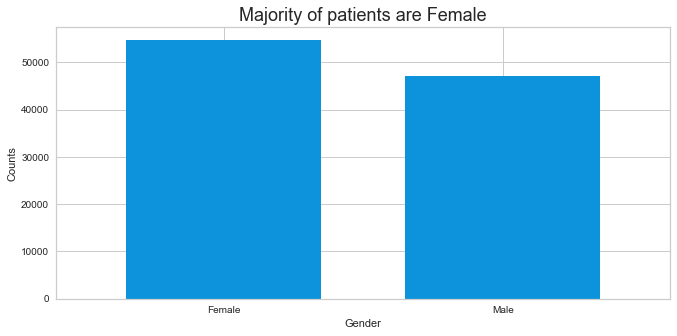

In [110]:
df['gender'].value_counts().plot(kind='bar',width=0.7,color='#0C93DB',figsize=(11,5),rot='horizontal')
plt.title('Majority of patients are Female',size=18)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

In [111]:
df['payer_code'].value_counts()

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [112]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [113]:
df['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [122]:
df['A1Cresult'].value_counts()

Series([], Name: A1Cresult, dtype: int64)

In [116]:
df['A1Cresult'].value_counts()

Series([], Name: A1Cresult, dtype: int64)

In [117]:
df['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [118]:
df['insulin'].value_counts()


No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

### Goal: Predict readmission of the patient within 30 days of initial hospitalization.
        - Should we create new data set with only if patients are readmitted within 30 and ignore >30 days ?
        

In [168]:
# Goal: Predict readmission of the patient within 30 days of initial hospitalization.
#df_= df.loc[df['readmitted']!=">30",:]
#df_.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AgeGroup,weight_category
0,2278392,8222157,Caucasian,Female,0-10,NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,child,NaN
2,64410,86047875,AfricanAmerican,Female,20-30,NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,twenties,NaN
3,500364,82442376,Caucasian,Male,30-40,NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,thirties,NaN
4,16680,42519267,Caucasian,Male,40-50,NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,fourties,NaN
6,55842,84259809,Caucasian,Male,60-70,NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,414,411,V45,7,None,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,sixties,NaN


In [39]:
# Change all >30 and NO readmitted to NO 
df['readmitted'] = df['readmitted'].map({'NO':'NO','>30':'NO','<30':'YES'}) 

In [42]:
df['readmitted'].value_counts()

NO     90409
YES    11357
Name: readmitted, dtype: int64

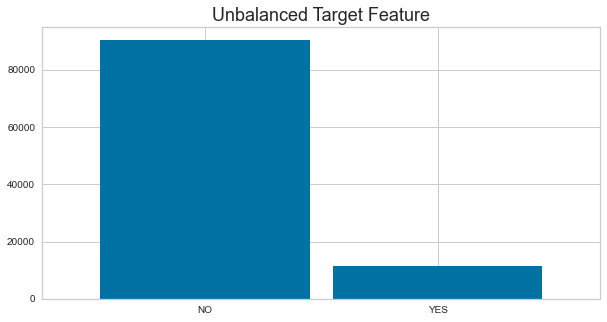

In [45]:
df['readmitted'].value_counts().plot(kind='bar',width=0.9,rot='horizontal',figsize=(10,5)) 
plt.title('Unbalanced Target Feature',size=18)
plt.show()

In [43]:
# Make target feature YES and NO
#df_['readmitted'] = df_['readmitted'].replace('<30','YES')
#df_.head()

In [46]:
#df_['weight_category'].isna().sum()/(df_.shape[0])

In [192]:
# Almost 98% of data in weight features are missing so will drop it even though wight is very important feature

### EDA

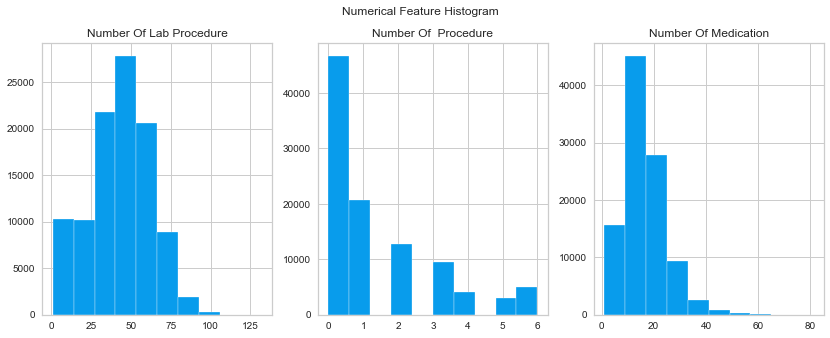

In [216]:
# Function that takes numerical data and create histogram 
fig,ax = plt.subplots(1,3,figsize=(14,5))

ax[0].hist(df['num_lab_procedures'],color='#089CEC',edgecolor='white') 
ax[0].set(title='Number Of Lab Procedure')
ax[1].hist(df['num_procedures'],color='#089CEC',edgecolor='white')
ax[1].set(title='Number Of  Procedure')
ax[2].hist(df['num_medications'],color='#089CEC',edgecolor='white')
ax[2].set(title='Number Of Medication')
plt.suptitle('Numerical Feature Histogram')
plt.show()

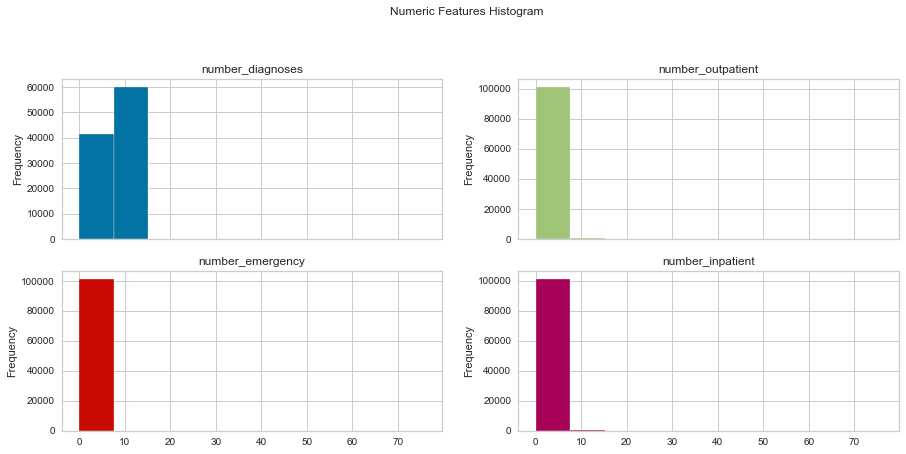

In [250]:
df.plot(kind='hist',y=['number_diagnoses','number_outpatient', 'number_emergency', 'number_inpatient'],
        edgecolor='white',figsize=[15,10],
        title=['number_diagnoses','number_outpatient', 'number_emergency', 'number_inpatient'],
        subplots=True,layout=(3,2),legend=False)
plt.suptitle('Numeric Features Histogram')
plt.show()

In [ ]:
# encode target feature 
df['readmitted']=df['readmitted'].map({'YES':1,'NO':0}) 

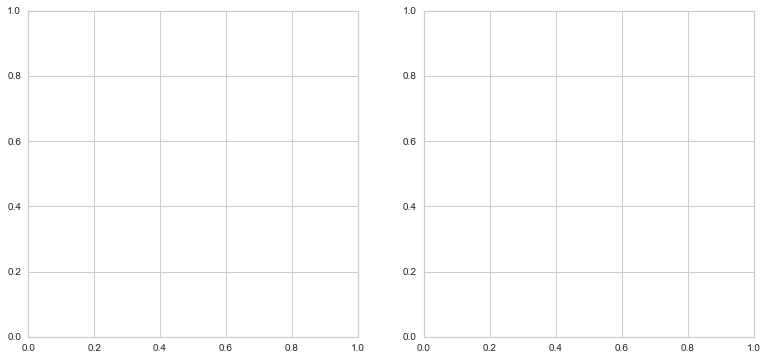

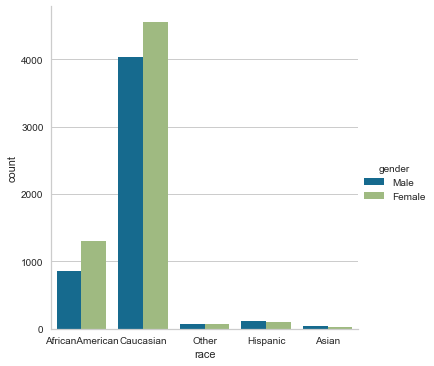

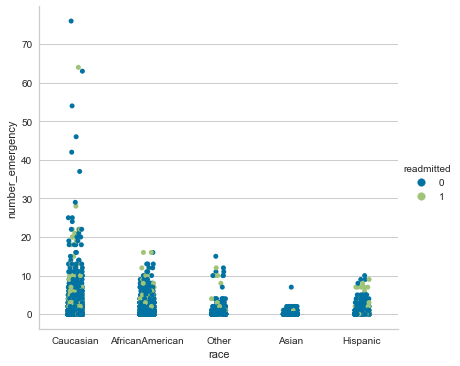

In [255]:
# Fix this plot 

# Among all the pepople who are readmitted what race and gender most likely to readmite

fig,axe = plt.subplots(1,2,figsize=(13,6))

sns.catplot(x='race',hue='gender',
            kind='count',data=df.loc[df['readmitted']==1,['race','gender']],ax=axe[0])
sns.catplot(x="race", y="number_emergency", hue="readmitted",  data=df,aspect=1.1,ax=axe[1])
#sns.catplot()
# plt.title('High Readmission Among White Female',size=18)
# plt.xlabel('Reace',size=14)
# plt.ylabel('Counts',size=14)
#plt.show()

### What age group people spends more time in the hospital among all readmitted patients ?

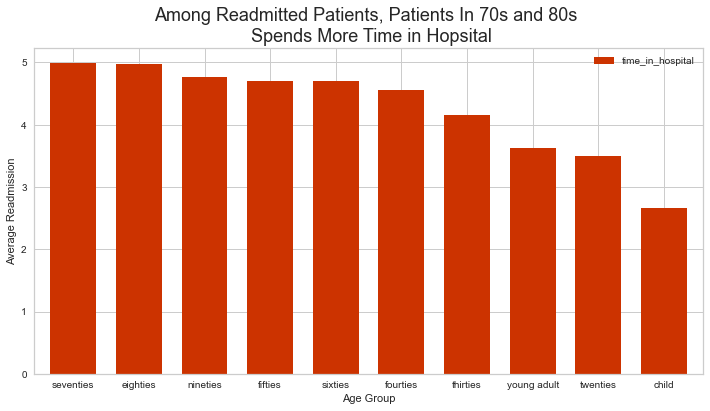

In [213]:

readmit_age= df.loc[df['readmitted']==1,['time_in_hospital','AgeGroup']].groupby(['AgeGroup']).mean()

readmit_age.sort_values(by='time_in_hospital',ascending=False).reset_index().plot(kind='bar',x='AgeGroup',
                                                                                  y='time_in_hospital',
                                                                                  figsize=(12,6),
                                                                                  width=.7,
                                                                                  rot='horizontal',
                                                                                  color='#cc3300')

plt.title('Among Readmitted Patients, Patients In 70s and 80s \n Spends More Time in Hopsital',size=18)
plt.ylabel('Average Readmission')
plt.xlabel('Age Group')
plt.show()


What is the distribution of time at hospital based on if readmission is YES or NO

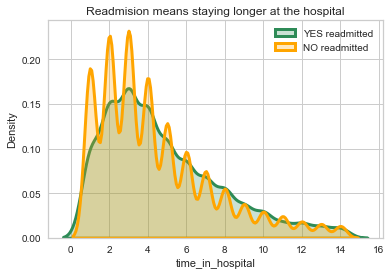

In [122]:
sns.distplot(df.loc[df['readmitted']==1,'time_in_hospital'],color='seagreen',hist=False,kde=True,
           kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "YES readmitted") 
sns.distplot(df.loc[df['readmitted']==0,'time_in_hospital'],color='orange',hist=False,kde=True,
            kde_kws={'shade':True,'linewidth':3},label='NO readmitted') 
plt.legend() 
plt.title('Readmision means staying longer at the hospital')
plt.show() 

In [165]:
df.head(2) 

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AgeGroup,weight_category,discharge_disposition_type,admission_source_type
0,Caucasian,Female,NULL,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,child,NaN,Not Mapped,Physician Referral
1,Caucasian,Female,Emergency,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,young adult,NaN,Discharged to home,Emergency Room


#### Realation Of Readmission With admission source typea and admission type

Plot on the left shows that the patients is more likely to get readmitted again in less than 30 days if they are a 
transfer patients from hospital inpt/same fac reslt in a sep claaim. 
And the plot on the right shows that if a patient is ER patients they are more than likely to readmit again in less than 30 days 

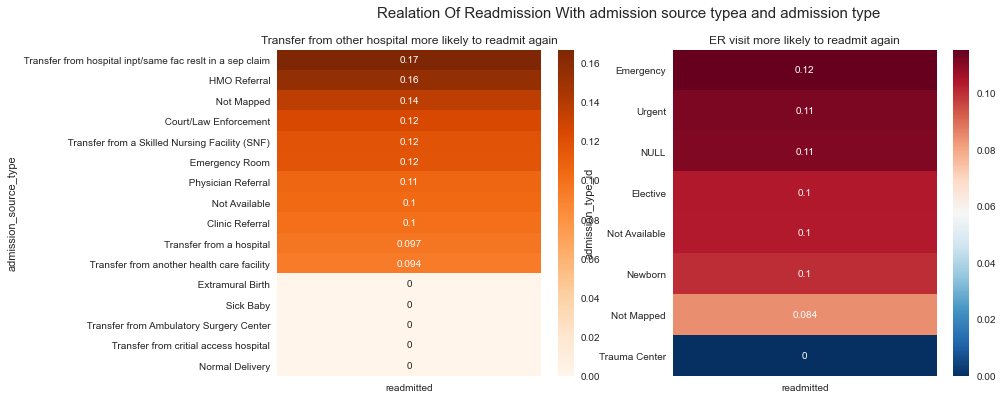

In [209]:
fig,ax = plt.subplots(1,2,figsize=(13,6))
sns.heatmap(df[['admission_source_type','readmitted']].groupby(by='admission_source_type').mean().sort_values(by='readmitted',ascending=False),annot=True,cmap='Oranges',ax=ax[0],label=False)
ax[0].set(title='Transfer from other hospital more likely to readmit again')
ax[1].set(title='ER visit more likely to readmit again')

sns.heatmap(df[['admission_type_id','readmitted']].groupby(by='admission_type_id').mean().sort_values(by='readmitted', ascending=False),annot=True,cmap='RdBu_r',ax=ax[1])
plt.suptitle('Realation Of Readmission With admission source typea and admission type',size=15)
plt.show()

In [214]:
df.head(2)

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AgeGroup,weight_category,discharge_disposition_type,admission_source_type
0,Caucasian,Female,NULL,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,child,NaN,Not Mapped,Physician Referral
1,Caucasian,Female,Emergency,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,Unknown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,young adult,NaN,Discharged to home,Emergency Room



Among patients who will not get readmited in less than 30 days, ***62.67%*** were discharged to their home 

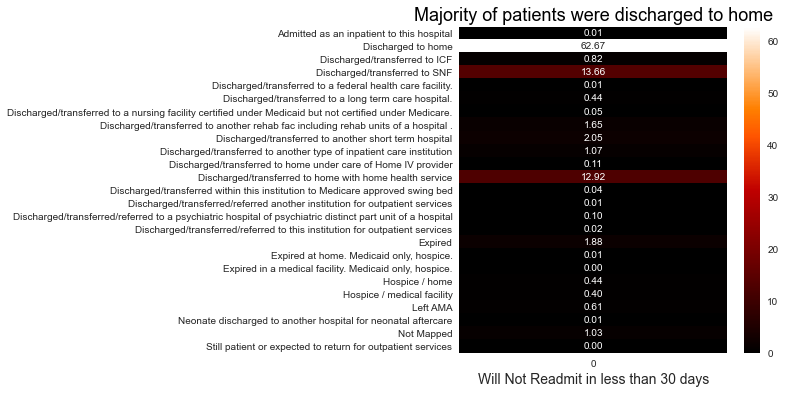

In [230]:
df_discharge = df.loc[df['readmitted']==0,['discharge_disposition_type','readmitted']]

ct = pd.crosstab(df_discharge['discharge_disposition_type'], 
                 df_discharge['readmitted'],
                    normalize=True ).round(4)*100 

plt.figure(figsize=(6,6))
discharge_readmit = sns.cubehelix_palette(start=0,light=1,as_cmap=True)
sns.heatmap(ct,annot=True,cmap='gist_heat',fmt='.2f',linewidths=.0)
plt.xlabel('Will Not Readmit in less than 30 days',size=14)
plt.ylabel('',size=14)
plt.title('Majority of patients were discharged to home',fontsize=18,color='black')
plt.show()

In [227]:
# df_discharge = df.loc[df['readmitted']==0,['discharge_disposition_type','readmitted']]

# ct = pd.crosstab(df['discharge_disposition_type'], 
#                  df['readmitted'],
#                     normalize=True ).round(4)*100 
# ct 


# plt.figure(figsize=(12,8))
# discharge_readmit = sns.cubehelix_palette(start=0,light=1,as_cmap=True)
# sns.heatmap(ct,annot=True,cmap='gist_heat',fmt='.2f',linewidths=.0)
# plt.xlabel('',size=14)
# plt.ylabel('',size=14)
# plt.title('',fontsize=18,color='black')
# plt.show()

#### Correlation of numerical features 

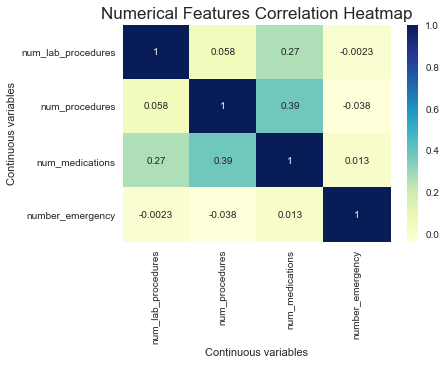

In [138]:
corr=df[['num_lab_procedures','num_procedures','num_medications','number_emergency']].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation matrix", y=-0.75)
plt.xlabel("Continuous variables")
plt.ylabel("Continuous variables")
plt.title('Numerical Features Correlation Heatmap',size=17)
plt.show()

##### Imputing missing data 

In [501]:
#Instantiate scikit-learn's SimpleImputer to replace "nan" values with the mode value
fill_nan = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [499]:
#df['race'].isna().sum()/df.shape[0]*100

2.2335554114340743

In [502]:
# Imputing race with mode
df['race']= fill_nan.fit_transform(df.loc[:,'race'].values.reshape(-1,1))

In [503]:

df['payer_code'].isna().sum()/df.shape[0]*100

39.5574160328597

#### Dummy Code Variables 

#### Scale the Numerical Variables 

#### Get the final dataset ready to model 

#### Split datasets into training and testing 

#### Fit initial logistic regression model 

#### Get important features 

#### Perform hyperparameter tunning 

#### Cross validation 

#### Get prediction on test set 

#### Evaluate the model 
  - Accuracy
  - Precision and Recall
  - ROC curve 
  

#### Interpret the Result 